In [ ]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dall E Datasets
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023'

calm_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/calm/')
nervous_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/')

number_files_calm_dall_e = len(calm_dall_e)
number_files_nervous_dall_e = len(nervous_dall_e)

print ('Calm ; ', number_files_calm_dall_e) #504, At the beginning
print ('Uncalm ; ', number_files_nervous_dall_e) #504 , At the beginning

Calm ;  511
Uncalm ;  511


In [ ]:
input_path_dall_e = []
label_dall_e = []
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'

for class_name in os.listdir(Dall_E):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/' + class_name):
    if class_name == 'uncalm':
      label_dall_e.append(1)
    else:
      label_dall_e.append(0)
    input_path_dall_e.append(os.path.join('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/', class_name, path))

print(input_path_dall_e[1], label_dall_e[1])
print(input_path_dall_e[-1], label_dall_e[-1])
#column name of the sheet
df_dalle=pd.DataFrame(list(zip(input_path_dall_e,label_dall_e )),columns=['images',"label "])
#change the file of exccl sheet
df_dalle.to_csv("//content/drive/MyDrive/Binary Classification Learn Dataset/20230601 All datasets Dall E.csv")

/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png 1
/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/calm/DALL·E 2023-04-12 22.30.57 - a black and white design consisting of precise geometric shapes that inspires a feeling calmness.png 0


In [ ]:
input_path_dall_e_train = []
label_dall_e_train = []
Dall_E_train = '/content/drive/MyDrive/Binary Classification Split Folder/010623/train/'

for class_name in os.listdir(Dall_E_train):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Split Folder/010623/train/' + class_name):
    if class_name == 'uncalm':
      label_dall_e_train.append(1)
    else:
      label_dall_e_train.append(0)
    input_path_dall_e_train.append(os.path.join('/content/drive/MyDrive/Binary Classification Split Folder/010623/train/', class_name, path))

print(input_path_dall_e_train[1], label_dall_e_train[1])
print(input_path_dall_e_train[-1], label_dall_e_train[-1])
#column name of the sheet
df_train=pd.DataFrame(list(zip(input_path_dall_e_train,label_dall_e_train )),columns=['images',"label "])
#change the file of exccl sheet
df_train.to_csv("/content/drive/MyDrive/Binary Classification Split Folder/CSV Files/20230601 Train Dall E.csv")

/content/drive/MyDrive/Binary Classification Split Folder/010623/train/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png 1
/content/drive/MyDrive/Binary Classification Split Folder/010623/train/calm/DALL·E 2023-04-12 22.30.57 - a black and white design consisting of precise geometric shapes that inspires a feeling calmness.png 0


In [ ]:
input_path_dall_e_val = []
label_dall_e_val = []
Dall_E_val = '/content/drive/MyDrive/Binary Classification Split Folder/010623/val/'

for class_name in os.listdir(Dall_E_val):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Split Folder/010623/val/' + class_name):
    if class_name == 'uncalm':
      label_dall_e_val.append(1)
    else:
      label_dall_e_val.append(0)
    input_path_dall_e_val.append(os.path.join('/content/drive/MyDrive/Binary Classification Split Folder/010623/val/', class_name, path))

print(input_path_dall_e_val[1], label_dall_e_val[1])
print(input_path_dall_e_val[-1], label_dall_e_val[-1])
#column name of the sheet
df_val=pd.DataFrame(list(zip(input_path_dall_e_val,label_dall_e_val )),columns=['images',"label "])
#change the file of exccl sheet
df_val.to_csv("/content/drive/MyDrive/Binary Classification Split Folder/CSV Files/20230601 Vall Dall E.csv")

/content/drive/MyDrive/Binary Classification Split Folder/010623/val/uncalm/DALL·E 2022-12-19 13.44.57 - visual inorganic structure as a drawing in black and white that makes you nervos.png 1
/content/drive/MyDrive/Binary Classification Split Folder/010623/val/calm/DALL·E 2023-04-13 11.27.11 - A simple yet elegant black and white pattern of geometric shapes that evokes a sense of calmness .png 0


In [ ]:
input_path_dall_e_test = []
label_dall_e_test = []
Dall_E_test = '/content/drive/MyDrive/Binary Classification Split Folder/010623/test/'

for class_name in os.listdir(Dall_E_test):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Split Folder/010623/test/' + class_name):
    if class_name == 'uncalm':
      label_dall_e_test.append(1)
    else:
      label_dall_e_test.append(0)
    input_path_dall_e_test.append(os.path.join('/content/drive/MyDrive/Binary Classification Split Folder/010623/test/', class_name, path))

print(input_path_dall_e_test[1], label_dall_e_test[1])
print(input_path_dall_e_test[-1], label_dall_e_test[-1])
#column name of the sheet
df_test=pd.DataFrame(list(zip(input_path_dall_e_test,label_dall_e_test )),columns=['images',"label "])
#change the file of exccl sheet
df_test.to_csv("/content/drive/MyDrive/Binary Classification Split Folder/CSV Files/20230601 Test Dall E.csv")

/content/drive/MyDrive/Binary Classification Split Folder/010623/test/uncalm/DALL·E 2023-03-09 20.02.36 - visual inorganic structure as a drawing in black and white that makes you Nervous  - Copy.png 1
/content/drive/MyDrive/Binary Classification Split Folder/010623/test/calm/DALL·E 2023-04-12 22.52.44 - organic calm grafis white _ black patern .png 0


In [ ]:
len(input_path_dall_e) #1008 images

1022

In [ ]:
len(label_dall_e) #output 1008 images

1022

In [ ]:
len(input_path_dall_e_train) #704 images

816

In [ ]:
len(label_dall_e_train) #output 704 images

816

In [ ]:
len(input_path_dall_e_val) #200 images

102

In [ ]:
len(label_dall_e_val) #output 200 images

102

In [ ]:
len(input_path_dall_e_test) #104 images

104

In [ ]:
len(label_dall_e_test) #output 104 images

104

In [ ]:
print(input_path_dall_e)
print(label_dall_e)

['/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.36 - visual geometric structure as a drawing in black and white that makes you Nervous  - Copy.png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.10.53 - visual geometric structure as a drawing in black and white that makes you Nervous  - Copy.png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.11.48 - visual geometric structure as a drawing in black and white that makes you Nervous .png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.02.36 - visual inorganic structure as a drawing in black and white that makes you Nervous  - Copy.png', '/conten

In [ ]:
df_dall_e = pd.DataFrame() #1008 images
df_dall_e['images'] = input_path_dall_e
df_dall_e['label'] = label_dall_e
df_dall_e = df_dall_e.sample(frac=1).reset_index(drop=True)
df_dall_e.tail()

,images,label
1017,/content/drive/MyDrive/Binary Classification L...,0
1018,/content/drive/MyDrive/Binary Classification L...,1
1019,/content/drive/MyDrive/Binary Classification L...,1
1020,/content/drive/MyDrive/Binary Classification L...,1
1021,/content/drive/MyDrive/Binary Classification L...,1


In [ ]:
df_dalle = pd.DataFrame() #1008 images
df_dalle['images'] = input_path_dall_e
df_dalle['label'] = label_dall_e
df_dalle = df_dalle.sample(frac=1).reset_index(drop=True)
df_dalle.tail()

,images,label
1017,/content/drive/MyDrive/Binary Classification L...,0
1018,/content/drive/MyDrive/Binary Classification L...,1
1019,/content/drive/MyDrive/Binary Classification L...,1
1020,/content/drive/MyDrive/Binary Classification L...,1
1021,/content/drive/MyDrive/Binary Classification L...,0


In [ ]:
df_train = pd.DataFrame() #704 images
df_train['images'] = input_path_dall_e_train
df_train['label'] = label_dall_e_train
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.tail()

,images,label
811,/content/drive/MyDrive/Binary Classification S...,1
812,/content/drive/MyDrive/Binary Classification S...,0
813,/content/drive/MyDrive/Binary Classification S...,0
814,/content/drive/MyDrive/Binary Classification S...,0
815,/content/drive/MyDrive/Binary Classification S...,1


In [ ]:
df_val = pd.DataFrame() #200 images
df_val['images'] = input_path_dall_e_val
df_val['label'] = label_dall_e_val
df_val = df_val.sample(frac=1).reset_index(drop=True)
df_val.tail()

,images,label
97,/content/drive/MyDrive/Binary Classification S...,0
98,/content/drive/MyDrive/Binary Classification S...,0
99,/content/drive/MyDrive/Binary Classification S...,0
100,/content/drive/MyDrive/Binary Classification S...,0
101,/content/drive/MyDrive/Binary Classification S...,0


In [ ]:
df_test = pd.DataFrame() #100 images
df_test['images'] = input_path_dall_e_test
df_test['label'] = label_dall_e_test
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.tail()

,images,label
99,/content/drive/MyDrive/Binary Classification S...,0
100,/content/drive/MyDrive/Binary Classification S...,1
101,/content/drive/MyDrive/Binary Classification S...,1
102,/content/drive/MyDrive/Binary Classification S...,1
103,/content/drive/MyDrive/Binary Classification S...,1


[Text(0, 0, '511'), Text(0, 0, '511')]

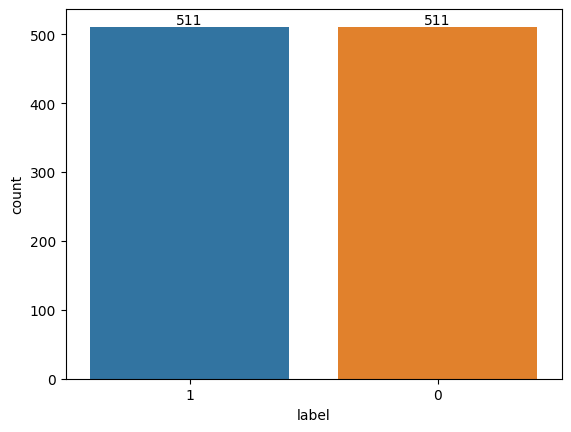

In [ ]:
import seaborn as sns
ax_dall_e = sns.countplot(x=df_dall_e['label'],
                   order=df_dall_e['label'].value_counts(ascending=False).index);

abs_values_dall_e = df_dall_e['label'].value_counts(ascending=False).values

ax_dall_e.bar_label(container=ax_dall_e.containers[0], labels=abs_values_dall_e)

#Balance datasets - 511 & 511

In [ ]:
df_dall_e['label'] = df_dall_e['label'].astype('str')

In [ ]:
train_dall_e, test_dall_e = train_test_split(df_dall_e, test_size = 0.2, random_state = 2023)

In [ ]:
train_dall_e.head()

,images,label
416,/content/drive/MyDrive/Binary Classification L...,1
880,/content/drive/MyDrive/Binary Classification L...,1
715,/content/drive/MyDrive/Binary Classification L...,1
496,/content/drive/MyDrive/Binary Classification L...,0
130,/content/drive/MyDrive/Binary Classification L...,1


In [ ]:
train_dall_e.shape

(817, 2)

In [ ]:
test_dall_e.shape

(205, 2)

In [ ]:
test_dall_e.head()

,images,label
448,/content/drive/MyDrive/Binary Classification L...,0
49,/content/drive/MyDrive/Binary Classification L...,1
425,/content/drive/MyDrive/Binary Classification L...,1
765,/content/drive/MyDrive/Binary Classification L...,1
493,/content/drive/MyDrive/Binary Classification L...,1


In [ ]:
DATADIR = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'
CATEGORIES = ['calm','uncalm']
IMG_SIZE=224

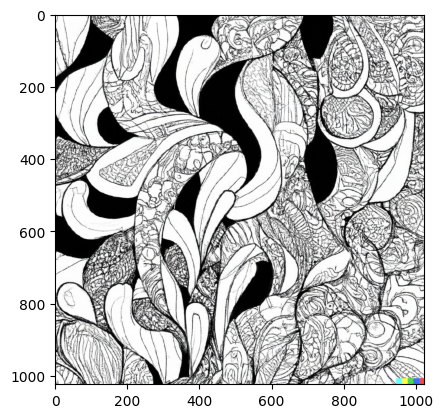

In [ ]:
import cv2
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
all_images = []
labels = []
for path in glob.glob("/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/*"):
    label = path.split("/")[-1]
    for image_path in glob.glob(os.path.join(path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        all_images.append(image)
        labels.append(label)
all_images = np.array(all_images)
labels = np.array(labels)

In [ ]:
len(all_images)

1022

In [ ]:
len(labels)

1022

In [ ]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [ ]:
id_to_label_dict

{0: 'calm', 1: 'uncalm'}

In [ ]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [ ]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(5, 5)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            # axs[i, j].xaxis.set_ticklabels([])
            # axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

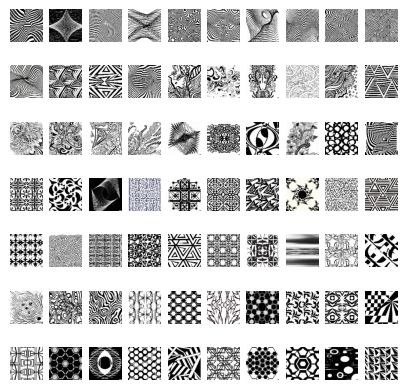

In [ ]:
plot_image_grid(all_images[940:1010], 7, 10)

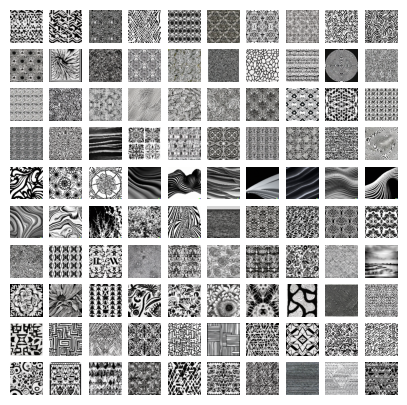

In [ ]:
plot_image_grid(all_images[600:700], 10, 10)

In [ ]:
scaler = StandardScaler()
images_scaled = scaler.fit_transform([i.flatten() for i in all_images])

In [ ]:
pca = PCA(0.97)
pca_result = pca.fit_transform(images_scaled)

In [ ]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [ ]:
def visualize_scatter_with_images(data_2d, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid()
    artists = []
    for xy, i in zip(data_2d, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(data_2d)
    ax.autoscale()
    plt.show()

In [ ]:
def visualize_scatter(data_2d, label_ids, id_to_label_dict=None, figsize=(20,20)):
    if not id_to_label_dict:
        id_to_label_dict = {v:i for i,v in enumerate(np.unique(label_ids))}

    plt.figure(figsize=figsize)
    plt.grid()

    nb_classes = len(np.unique(label_ids))

    cmap = plt.cm.get_cmap("jet", nb_classes)

    for i, label_id in enumerate(np.unique(label_ids)):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    c= cmap(i),
                    label=id_to_label_dict[label_id])
    #plt.legend(loc='best')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=1, fontsize=figsize[0])

<ipython-input-42-8cb34cc8c31c>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("jet", nb_classes)
<ipython-input-42-8cb34cc8c31c>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_2d[np.where(label_ids == label_id), 0],


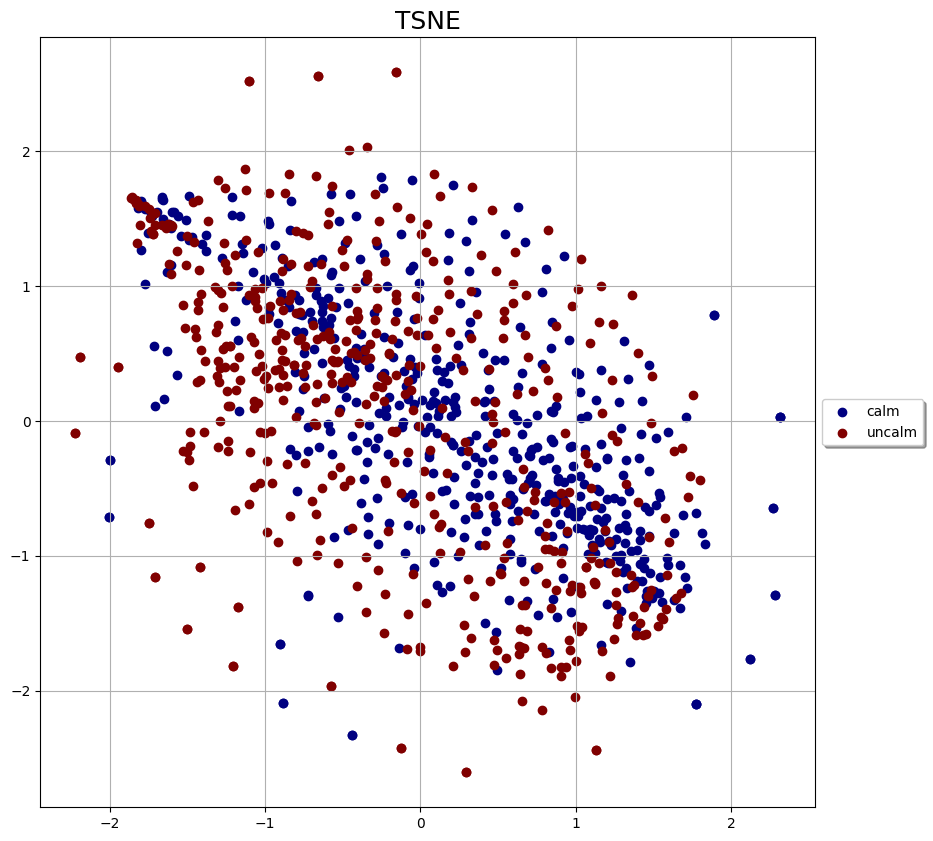

In [ ]:
visualize_scatter(tsne_result_scaled, label_ids, id_to_label_dict, figsize=(10, 10))
plt.title("TSNE", fontsize=18)
plt.savefig("TSNE.jpg")

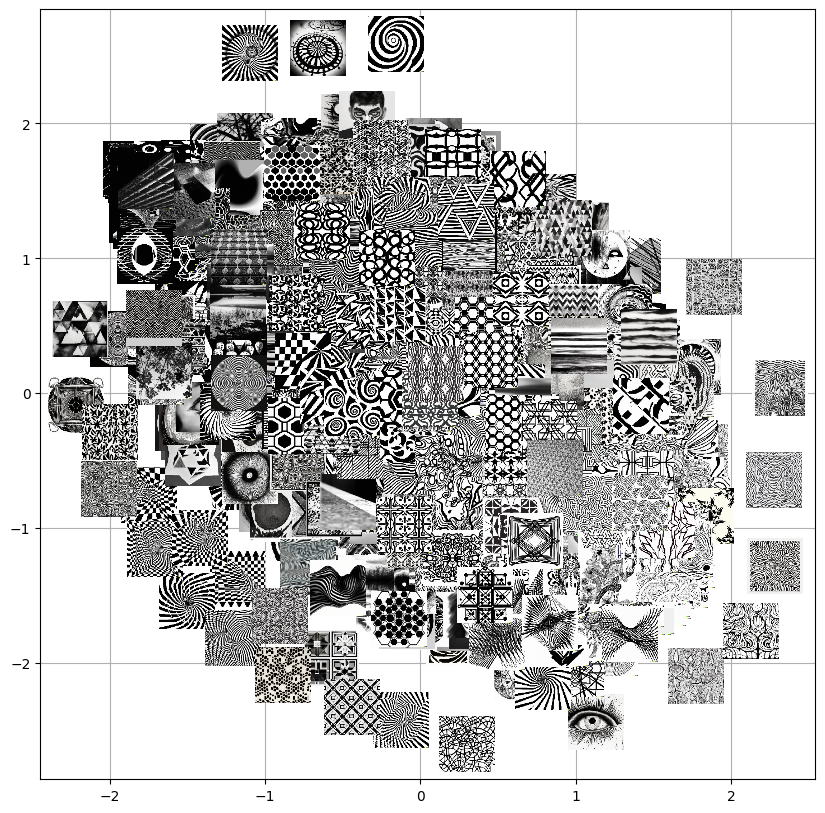

<Figure size 640x480 with 0 Axes>

In [ ]:
visualize_scatter_with_images(tsne_result_scaled, all_images, image_zoom=0.4, figsize=(10, 10))
plt.savefig("TSNE_IMAGES.jpg")

# Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, label_ids, test_size=0.3, random_state=21)

In [ ]:
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.545 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.531 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.510 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.503 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.490 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=1, gamma=0.0001)


In [ ]:
test_predictions = grid.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 68.729642
